## SVM

### Methods

Support vector machine (SVM) models are classification models, mainly used for two labels, that assume linear separability in order to predict labels. The general idea is to create an object that lives one dimension lower than that of the data to separate the higher dimension data. So, for a typical scatterplot with two dimensions, we would draw a line to separate the classes. As dimensionality increases, the separation object increases in complexity as well. 

A possible problem with this method is that data may not be linearly separable. To counteract this issue, we can use several tricks or methods to separate the data. One important point to raise here is the use of soft and hard margins. A hard margin assumes linear separability, while a soft margin assumes separation is not possible and allows data points to cross the hyperplane. Soft margins then assume that the great majority of points can be classified as initially intended, but with a few errors.

Furthermore, the Kernel Trick can also be used on on-linearly separable data. The Kernel Trick maps the data inputs onto a higher dimension to create an object that could successfully separate data that on a lower dimension is not separable.

### Grabbing data and preparing it for the model

In the first few steps, I load the text data that I created during the Naive Baye's portion of the website and process it as necessary. I make sure to create the labels and to vectorize the text.

In [1]:
# importing some libraries i'll need
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
from sklearn.metrics import accuracy_score

# load text data
df=pd.read_csv('../data/cleanData/wiki-crawl-results.csv')  
print(df.shape)

# convert from strings to labels to integers
labels=[];
y1=[]
for label in df["label"]:
    if label not in labels:
        labels.append(label)
        print("index =",len(labels)-1,": label =",label)
    for i in range(0,len(labels)):
        if(label==labels[i]):
            y1.append(i)
y1=np.array(y1)

# convert df to list of strings
corpus=df["text"].to_list()
y2=df["sentiment"].to_numpy()

# initialize count vectorizer
# minDF = 0.01 means "ignore terms that appear in less than 1% of the documents". 
# minDF = 5 means "ignore terms that appear in less than 5 documents".
vectorizer=CountVectorizer(min_df=0.001)   

# RUN COUNT VECTORIZER ON OUR COURPUS 
Xs = vectorizer.fit_transform(corpus)   
X = np.array(Xs.todense())

# convert to one-hot vectors
maxs = np.max(X,axis=0)
X = np.ceil(X/maxs)

# split the data
from sklearn.model_selection import train_test_split
test_ratio=0.2
x_train, x_test, y_train, y_test = train_test_split(X, y1, test_size=test_ratio, random_state=0)
y_train=y_train.flatten()
y_test=y_test.flatten()

/Users/modeedna/opt/anaconda3/envs/ANLY501/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


(7119, 3)
index = 0 : label = FIFA Qatar
index = 1 : label = FIFA Ecuador
index = 2 : label = FIFA Senegal
index = 3 : label = FIFA Netherlands
index = 4 : label = FIFA England
index = 5 : label = FIFA IR
index = 6 : label = FIFA Iran
index = 7 : label = FIFA USA
index = 8 : label = FIFA Wales
index = 9 : label = FIFA Argentina
index = 10 : label = FIFA Saudi Arabia
index = 11 : label = FIFA Mexico
index = 12 : label = FIFA Poland
index = 13 : label = FIFA France
index = 14 : label = Australia
index = 15 : label = FIFA Denmark
index = 16 : label = FIFA Tunisia
index = 17 : label = FIFA Spain
index = 18 : label = FIFA Costa Rica
index = 19 : label = FIFA Germany
index = 20 : label = FIFA Japan
index = 21 : label = FIFA Belgium
index = 22 : label = FIFA Canada
index = 23 : label = FIFA Morocco
index = 24 : label = FIFA Croatia
index = 25 : label = FIFA Brazil
index = 26 : label = FIFA Serbia
index = 27 : label = FIFA Switzerland
index = 28 : label = FIFA Cameroon
index = 29 : label = FIF

### Class distribution

The class distribution isn't even. To understand the distribution, I took the count of each label and divided it by the max count of all labels. Ideally, we would want to see percentage values within the 0.90 range, but we have plenty of labels that are at least 4 times smaller in count than the max count label. Having labels that occur more often than others will cause the model to favor those labels, and is likely to misclassify more often than a model with even-weighted labels.

In [2]:
# understand class distribution
from pandas import value_counts
daf = pd.DataFrame(value_counts(y1).sort_index())
daf['percentage'] = daf[0]/max(daf[0])
daf.head(10)

,0,percentage
0,107,0.190053
1,221,0.392540
2,222,0.394316
3,107,0.190053
4,361,0.641208
5,134,0.238011
6,190,0.337478
7,207,0.367673
8,177,0.314387
9,196,0.348135


### Feature selection

For this type of model, the features are the texts for the sentiment scores. Feature selection would then come from cleaning the text, which has already been done. I have already removed stop words from the text and did basic text cleaning like stemming, etc. After the cleaning, there is no more feature selection to be done.

### Model tuning

For model tuning, the selection between models would be to figure out which multidimensional method to use for the model. I used the approach of one vs all, but we could've used the kernel trick or others. Given that the model takes a long time to converge, it felt unnecessary to create a for loop trying different methods; it would've taken hours to run and I would lose too much time doing it. Since my prediction won't actually use text data and I'm doing this part to complete the homework, I decided to select my first choice as the optimal choice.

### Final model

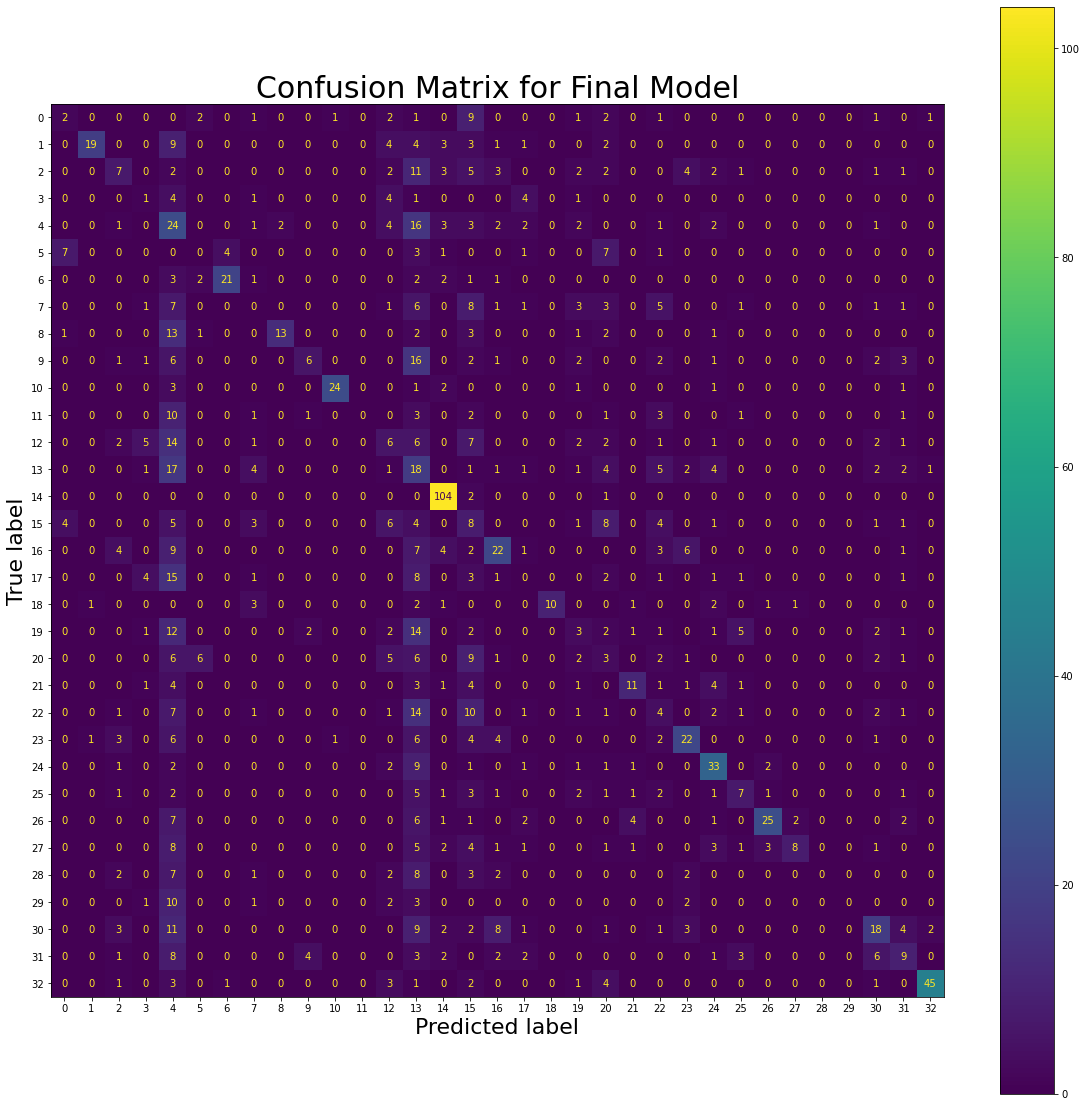

In [3]:
from sklearn.svm import SVC
clf = SVC(decision_function_shape='ovo')
clf.fit(x_train, y_train)

yt_preds = clf.predict(x_test)
ytr_preds = clf.predict(x_train)

# Display Confusion Matrix for the test data. Remember to use the ConfusionMatrixDisplay function.
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test,yt_preds)
cmp = ConfusionMatrixDisplay(cm)
fig, ax = plt.subplots(figsize=(20,20))
plt.title('Confusion Matrix for Final Model', fontsize=30)
plt.xlabel('Predicted label', fontsize=22)
plt.ylabel('True label', fontsize=22)
cmp.plot(ax=ax);

In [4]:
# print accuracy score
print('Accuracy score for the SVM model is: '+ str(accuracy_score(y_test,yt_preds)))

Accuracy score for the SVM model is: 0.3321629213483146


### Baseline model for comparison

In order to compare my predictive model, I created a baseline predictor with a 1/33 chance of generating each label (due to there being 33 labels).

-----GENERATING DATA-----
unique entries: dict_keys([21, 0, 9, 7, 24, 22, 29, 2, 13, 16, 6, 17, 19, 26, 23, 11, 5, 31, 3, 27, 32, 12, 18, 20, 28, 1, 8, 30, 25, 10, 15, 14, 4])
count of labels: dict_values([50, 44, 47, 51, 45, 43, 36, 45, 48, 43, 33, 45, 39, 45, 43, 34, 40, 43, 53, 50, 43, 32, 45, 47, 55, 30, 48, 34, 39, 44, 39, 51, 40])
probability of labels: [0.03511236 0.03089888 0.03300562 0.03581461 0.03160112 0.03019663
 0.0252809  0.03160112 0.03370787 0.03019663 0.02317416 0.03160112
 0.02738764 0.03160112 0.03019663 0.0238764  0.02808989 0.03019663
 0.0372191  0.03511236 0.03019663 0.02247191 0.03160112 0.03300562
 0.0386236  0.02106742 0.03370787 0.0238764  0.02738764 0.03089888
 0.02738764 0.03581461 0.02808989]


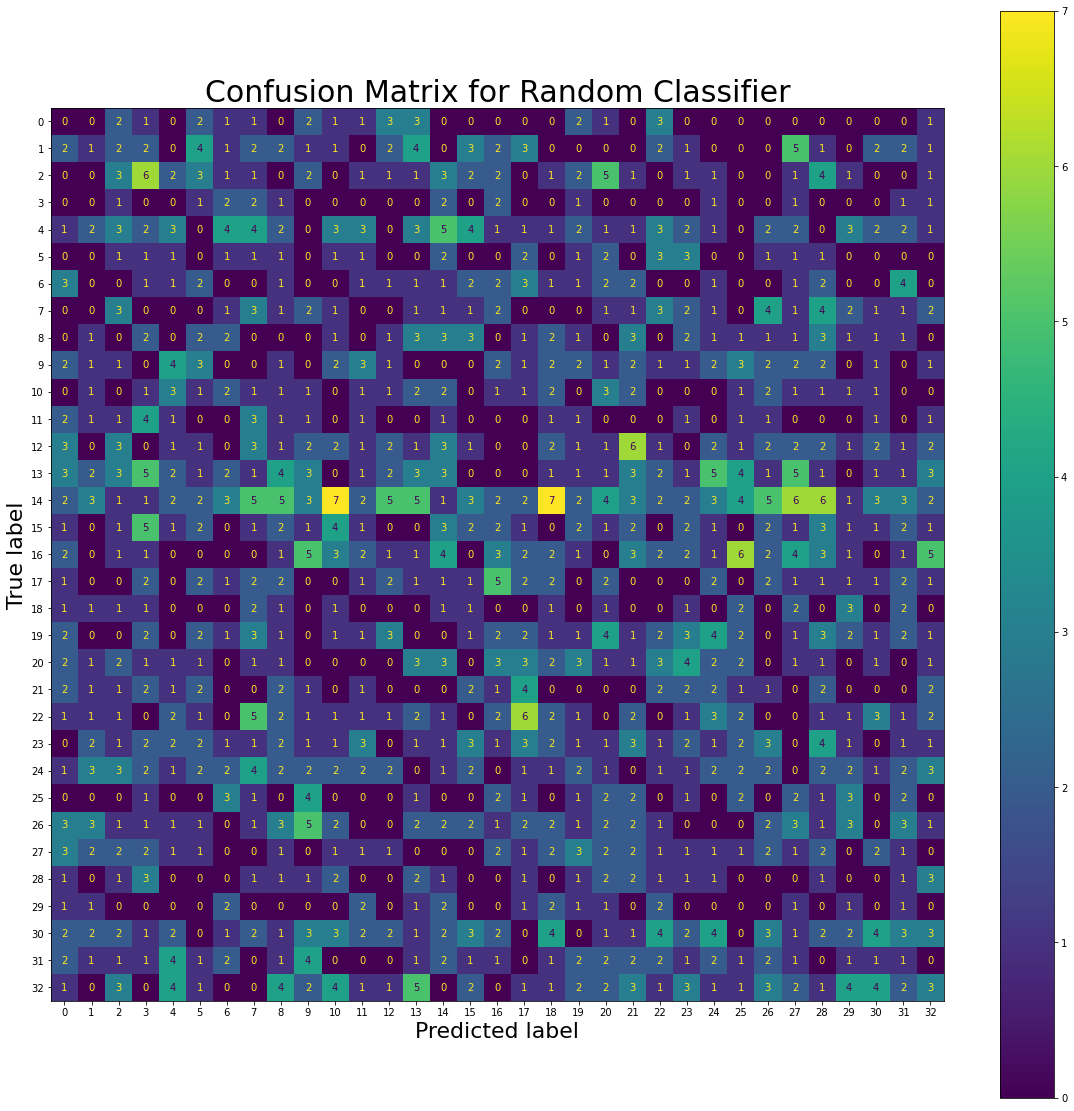

In [5]:
# random classifier
import numpy as np
import random
from collections import Counter
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support

def generate_label_data(class_labels, weights,N=10000):
    #e.g. class_labels=[0,1]  weights=[0.2,0.8] (should sum to one)
    random.seed(42)
    y=random.choices(class_labels, weights = weights, k = N)
    print("-----GENERATING DATA-----")
    print("unique entries:",Counter(y).keys())  
    print("count of labels:",Counter(y).values()) # counts the elements' frequency
    print("probability of labels:",np.fromiter(Counter(y).values(), dtype=float)/len(y)) # counts the elements' frequency
    return y

#TEST
y=generate_label_data([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32],[1/33,1/33,1/33,1/33,1/33,1/33,1/33,1/33,1/33,1/33,1/33,1/33,1/33,1/33,1/33,1/33,1/33,1/33,1/33,1/33,1/33,1/33,1/33,1/33,1/33,1/33,1/33,1/33,1/33,1/33,1/33,1/33,1/33],1424)

# create the confusion matrix plot
cm = confusion_matrix(y_test,y)
cmp = ConfusionMatrixDisplay(cm)
fig, ax = plt.subplots(figsize=(20,20))
plt.title('Confusion Matrix for Random Classifier', fontsize=30)
plt.xlabel('Predicted label', fontsize=22)
plt.ylabel('True label', fontsize=22)
cmp.plot(ax=ax);

In [6]:
# print accuracy score
print('Accuracy score for the random classifier is: ' + str(accuracy_score(y_test,y)))

Accuracy score for the random classifier is: 0.032303370786516857


### Final results and conclusion

I was very surprised by the SVM's ability to predict on the test data. With an accuracy score of 0.33, it means that it can correctly predict the text's label from 33 choices based on the sentiment score of the text. To be fair, I must mention that I didn't remove partial mentions of the terms within the text, so it affects the accuracy rate. Either way, this is a great score. Compared to the random classifier, it is better by 10-fold.

For future steps, I think the first thing to do would be to recreate the model after removing label mentions within the texts, to see if it could accurately predict on their respective labels. I could also try different higher-dimensionality models; I mentioned that I only used one vs all for this problem but I could try the other methods and find out if they yield better results. Furthermore, although out of scope for this class, I could try a neural network to see if it can perform better than the SVM.

Since my project focuses on using numerical data instead of text data for the predictions, this model won't transfer well into the goal of this project, but the exercise is good to understand how SVMs work and how they can predict on different dimensions.